In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import math
from skimage import filters
from skimage import feature

In [2]:
def calculateDistance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def calculateIdealLowPassFilter(D0,imgShape):
    lowPassScpectrum = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if calculateDistance((y,x),center) < D0:
                lowPassScpectrum[y,x] = 1
    return lowPassScpectrum

def low_pass(img):   
  
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    LowPassCenter =  center * calculateIdealLowPassFilter(30,img.shape)

    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)   

    return np.abs(inverse_LowPass)

In [3]:
def calculateDistance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def calculateButterworthHightPassFilter(D0,imgShape,n):
    hightPassScpectrum = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            hightPassScpectrum[y,x] = 1-1/(1+(calculateDistance((y,x),center)/D0)**(2*n))
    return hightPassScpectrum

def high_pass(img):   
  
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)

    HighPassCenter = center * calculateButterworthHightPassFilter(30,img.shape,2)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)  

    return np.abs(inverse_HighPass)

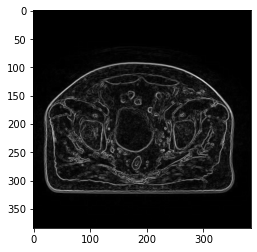

In [4]:
a=cv2.imread("CT/"+str(1)+".jpeg")
b=cv2.imread("MRI/"+str(1)+".jpeg")
c=plt.imread("RESULT/"+str(1)+".tif")

# MRI - CT images
ct_images = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
mr_images = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)

#Features1
edge_sobel_mr = filters.sobel(mr_images).reshape(-1,1)
edge_sobel_ct=filters.sobel(ct_images).reshape(-1,1)

#Feature2
edge_mr = feature.canny(mr_images).reshape(-1,1)
edge_ct=feature.canny(ct_images).reshape(-1,1)

#Feature3 Low Pass Filter
low_pass_mr=low_pass(mr_images).reshape(-1,1)
low_pass_ct=low_pass(ct_images).reshape(-1,1)

#Feature4 High Pass Filter
#high_pass_mr=high_pass(mr_images).reshape(-1,1)
#high_pass_ct=high_pass(ct_images).reshape(-1,1)

ct_images = ct_images.reshape(-1,1)
mr_images = mr_images.reshape(-1,1)
result_images = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)

plt.imshow(edge_sobel_mr.reshape(384,384),cmap="gray")




In [5]:

for i in range(2,6):
    a=cv2.imread("CT/"+str(i)+".jpeg")
    b=cv2.imread("MRI/"+str(i)+".jpeg")
    c=plt.imread("RESULT/"+str(i)+".tif")
    
    
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
    c = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)
    
    #Features1
    d = filters.sobel(b).reshape(-1,1)
    e=filters.sobel(a).reshape(-1,1)

    #Feature2
    g = feature.canny(b).reshape(-1,1)
    h=feature.canny(a).reshape(-1,1)
    
    #Feature3 Low Pass Filter
    x=low_pass(b).reshape(-1,1)
    y=low_pass(a).reshape(-1,1)
    
    a=a.reshape(-1,1)
    b=b.reshape(-1,1)
    
    ct_images=np.concatenate((ct_images, a), axis=0)
    mr_images=np.concatenate((mr_images, b), axis=0)
    result_images=np.concatenate((result_images, c), axis=0)   
    
    edge_sobel_mr=np.concatenate((edge_sobel_mr, d), axis=0)
    edge_sobel_ct=np.concatenate((edge_sobel_ct, e), axis=0)
    
    edge_mr=np.concatenate((edge_mr, g), axis=0)
    edge_ct=np.concatenate((edge_ct, h), axis=0)
    
    low_pass_mr=np.concatenate((low_pass_mr, x), axis=0)
    low_pass_ct=np.concatenate((low_pass_ct, y), axis=0)
    
    

print(ct_images.shape)
print(mr_images.shape)
print(result_images.shape)
print(low_pass_mr.shape)
print(low_pass_ct.shape)

(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)


In [6]:
X=np.concatenate((ct_images, mr_images,edge_sobel_mr,edge_sobel_ct,edge_mr,edge_ct,low_pass_mr,low_pass_ct), axis=1)
y=result_images

In [7]:
X.shape



(737280, 8)

In [8]:
y.shape

(737280, 1)

In [9]:
test_x2=cv2.imread("MRI/4.jpeg") 
test_x=cv2.imread("CT/4.jpeg") 


#Test images
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY)
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY)

#Feature Extraction 1
feature1_mr = filters.sobel(test_x2).reshape(-1,1)
feature1_ct=filters.sobel(test_x).reshape(-1,1)

#Feature Extraction 2
feature2_mr = feature.canny(test_x2).reshape(-1,1)
feature2_ct=feature.canny(test_x).reshape(-1,1)

#Feature3 Low Pass Filter
test_low_mr=low_pass(test_x2).reshape(-1,1)
test_low_ct=low_pass(test_x).reshape(-1,1)



test_x = test_x.reshape(-1,1)
test_x2 = test_x2.reshape(-1,1) 



#(ct_images, mr_images,edge_sobel_mr,edge_sobel_ct)
test=np.concatenate((test_x, test_x2,feature1_mr,feature1_ct,feature2_mr,feature2_ct,test_low_mr,test_low_ct), axis=1)

test_result=plt.imread("RESULT/4.tif")   
test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [10]:
test.shape

(147456, 8)

In [11]:
test_result.shape

(147456, 1)

In [12]:
import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
from sklearn import preprocessing




classifier=Sequential()
classifier.add(Dense(12, activation="relu",input_dim=8))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(6, activation="relu"))
classifier.add(Dense(3, activation="relu"))
classifier.add(Dense(6, activation="relu"))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(1, activation="relu"))

classifier.compile(optimizer="adam",loss="mean_absolute_error",metrics=["accuracy"])

summary=classifier.fit(X,y,epochs=35,batch_size=120,validation_data=(test,test_result))



Epoch 1/35
6144/6144 [==============================] - 6s 992us/step - loss: 11.8455 - accuracy: 0.5992 - val_loss: 9.7646 - val_accuracy: 0.6452
Epoch 2/35
6144/6144 [==============================] - 6s 912us/step - loss: 10.7858 - accuracy: 0.6068 - val_loss: 8.5722 - val_accuracy: 0.6532
Epoch 3/35
6144/6144 [==============================] - 6s 940us/step - loss: 10.2121 - accuracy: 0.6082 - val_loss: 8.3530 - val_accuracy: 0.6491
Epoch 4/35
6144/6144 [==============================] - 6s 930us/step - loss: 9.9735 - accuracy: 0.6090 - val_loss: 8.1130 - val_accuracy: 0.6501
Epoch 5/35
6144/6144 [==============================] - 6s 927us/step - loss: 9.7400 - accuracy: 0.6099 - val_loss: 7.7227 - val_accuracy: 0.6541
Epoch 6/35
6144/6144 [==============================] - 6s 912us/step - loss: 9.5279 - accuracy: 0.6105 - val_loss: 7.3908 - val_accuracy: 0.6580
Epoch 7/35
6144/6144 [==============================] - 6s 897us/step - loss: 9.3543 - accuracy: 0.6107 - val_loss: 7.113

In [13]:
y_pred=classifier.predict(test)
y_pred.shape

(147456, 1)

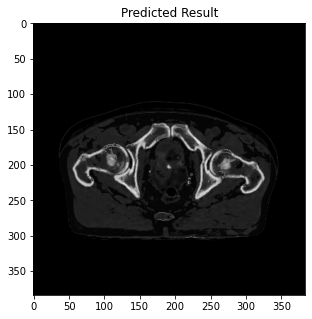

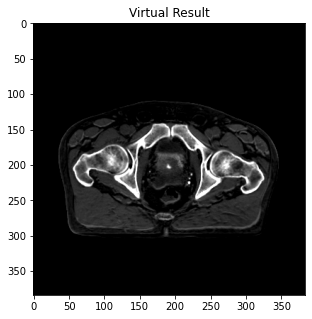

In [14]:
size=int(math.sqrt(len(y_pred)))
plt.figure(figsize=(5,5))
plt.title("Predicted Result")
plt.imshow(y_pred.reshape(size,size),cmap="gray")
plt.show()

plt.figure(figsize=(5,5))
plt.title("Virtual Result")
plt.imshow(test_result.reshape(size,size),cmap="gray")
plt.show()

In [15]:
print(np.unique(y_pred))

[0.0000000e+00 1.3468742e-02 3.1607628e-02 ... 2.9874051e+02 3.0266830e+02
 3.1907910e+02]


In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_result, y_pred)

5.8547544

In [17]:
classifier.save("best_result.h5")

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9

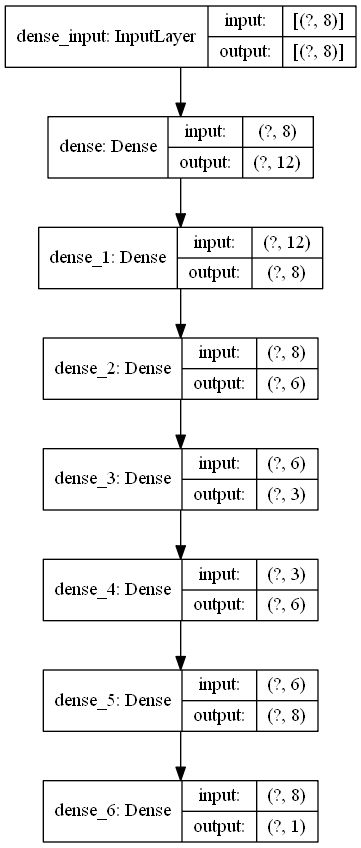

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='model1.png', show_shapes=True, show_layer_names=True)

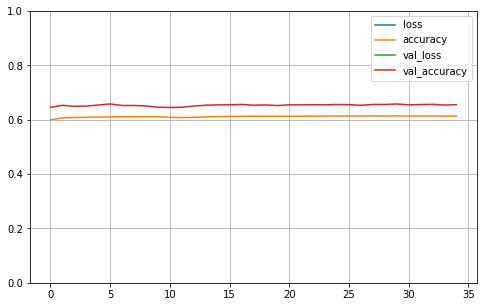

In [20]:
pd.DataFrame(summary.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [21]:
print("Error is : ",(mean_absolute_error(test_result, y_pred)/256) *100,"%")

Error is :  2.287013456225395 %


In [22]:
print("Accuracy is : ",100 - (mean_absolute_error(test_result, y_pred)/256) *100,"%")

Accuracy is :  97.7129865437746 %
